In [1]:
import pandas as pd
import numpy as np

c:\program files\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.DataFrame({
    'color': ['Red', 'Red', 'Red', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Red', 'Red'],
    'type': ['Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'SUV', 'SUV', 'SUV', 'SUV', 'Sports'],
    'origin': ['Domestic', 'Domestic', 'Domestic', 'Domestic', 'Imported', 'Imported', 'Imported', 'Domestic', 'Imported', 'Imported'],
    'stolen': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']    
})
df

,color,type,origin,stolen
0,Red,Sports,Domestic,Yes
1,Red,Sports,Domestic,No
2,Red,Sports,Domestic,Yes
3,Yellow,Sports,Domestic,No
4,Yellow,Sports,Imported,Yes
5,Yellow,SUV,Imported,No
6,Yellow,SUV,Imported,Yes
7,Yellow,SUV,Domestic,No
8,Red,SUV,Imported,No
9,Red,Sports,Imported,Yes


In [3]:
X = df.drop(columns=['stolen'])
y = df['stolen']

In [4]:
X_now = pd.get_dummies(data = X, drop_first=True)
X_now

,color_Yellow,type_Sports,origin_Imported
0,0,1,0
1,0,1,0
2,0,1,0
3,1,1,0
4,1,1,1
5,1,0,1
6,1,0,1
7,1,0,0
8,0,0,1
9,0,1,1


In [5]:
# lựa chọn thuật toán -> classification
from sklearn.tree import DecisionTreeClassifier

c:\program files\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
model = DecisionTreeClassifier()

In [7]:
model.fit(X_now, y)

DecisionTreeClassifier()

In [8]:
#color_Yellow	type_Sports	origin_Imported
#Red, SUV, Domestic => Stolen?
X_new = [[0, 0, 0]]
y_new = model.predict(X_new)
y_new

array(['No'], dtype=object)

In [9]:
# trực quan hóa cây quyết định
from IPython.display import Image 
import pydotplus
from sklearn import tree
from sklearn import datasets

c:\program files\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


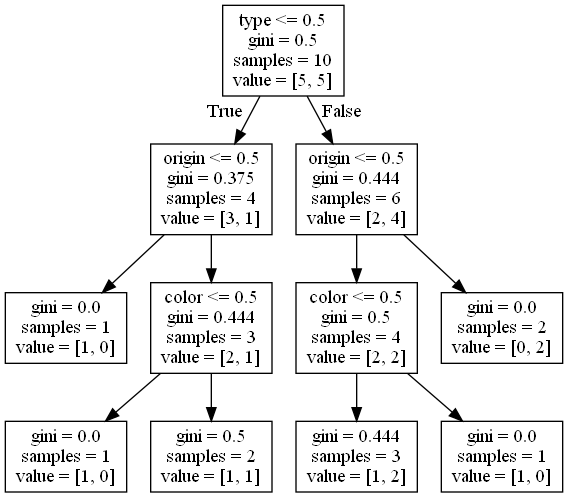

In [10]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())